# Import the required libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Load the dataset

In [28]:
face = fetch_olivetti_faces()

X = pd.DataFrame(face.data)
y = pd.DataFrame(face.target)

print("The dataset is loaded!")

The dataset is loaded!


# Splitting the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y )

print("The dataset is splitted among training set ( 80% ) and testing set ( 20% ).")

The dataset is splitted among training set ( 80% ) and testing set ( 20% ).


# Exploratory Data Analysis

In [30]:
print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of target vector (y): {y.shape}")

Shape of feature matrix (X): (400, 4096)
Shape of target vector (y): (400, 1)


In [31]:
print(X.head())

       0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094      4095  
0  0

In [32]:
print(X.describe)

<bound method NDFrame.describe of          0         1         2         3         4         5         6     \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

         7         8         9     ...   

C:\Users\DELL\AppData\Local\Temp\ipykernel_13504\1334767128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = class_counts.index, y = class_counts.values, palette = 'viridis')


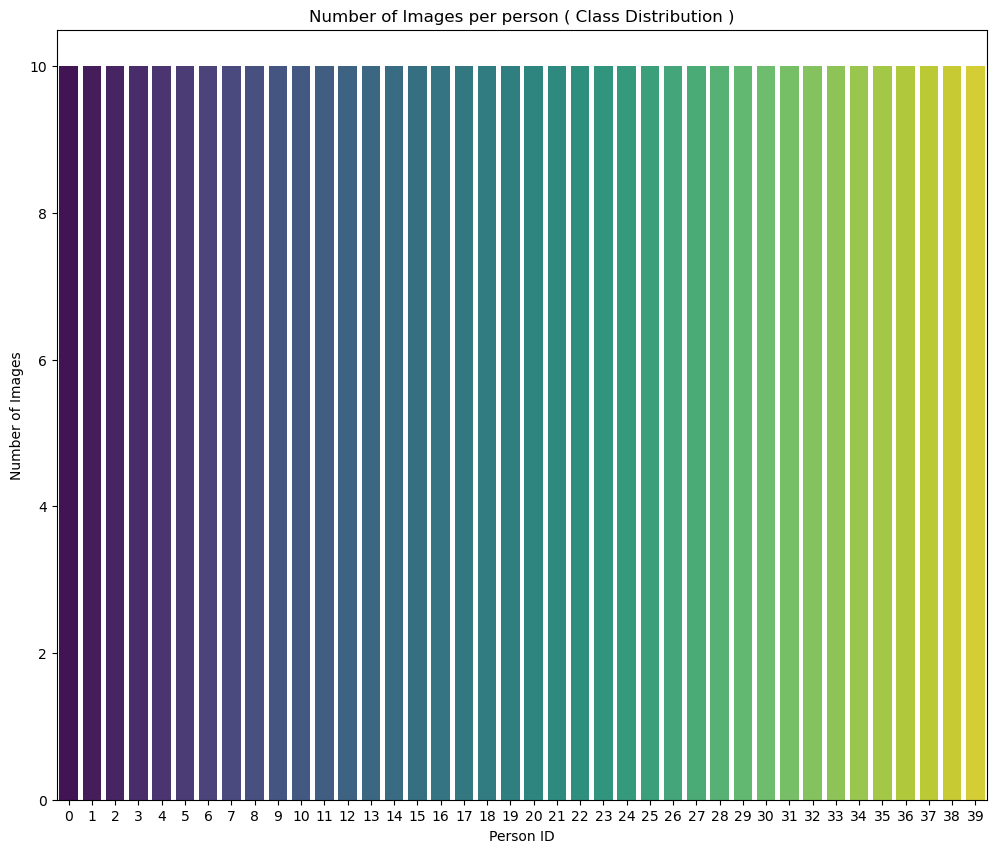

In [33]:
class_counts = y.squeeze().value_counts()

plt.figure(figsize = (12,10))
sns.barplot(x = class_counts.index, y = class_counts.values, palette = 'viridis')
plt.title("Number of Images per person ( Class Distribution )")
plt.xlabel('Person ID')
plt.ylabel("Number of Images")
plt.show()

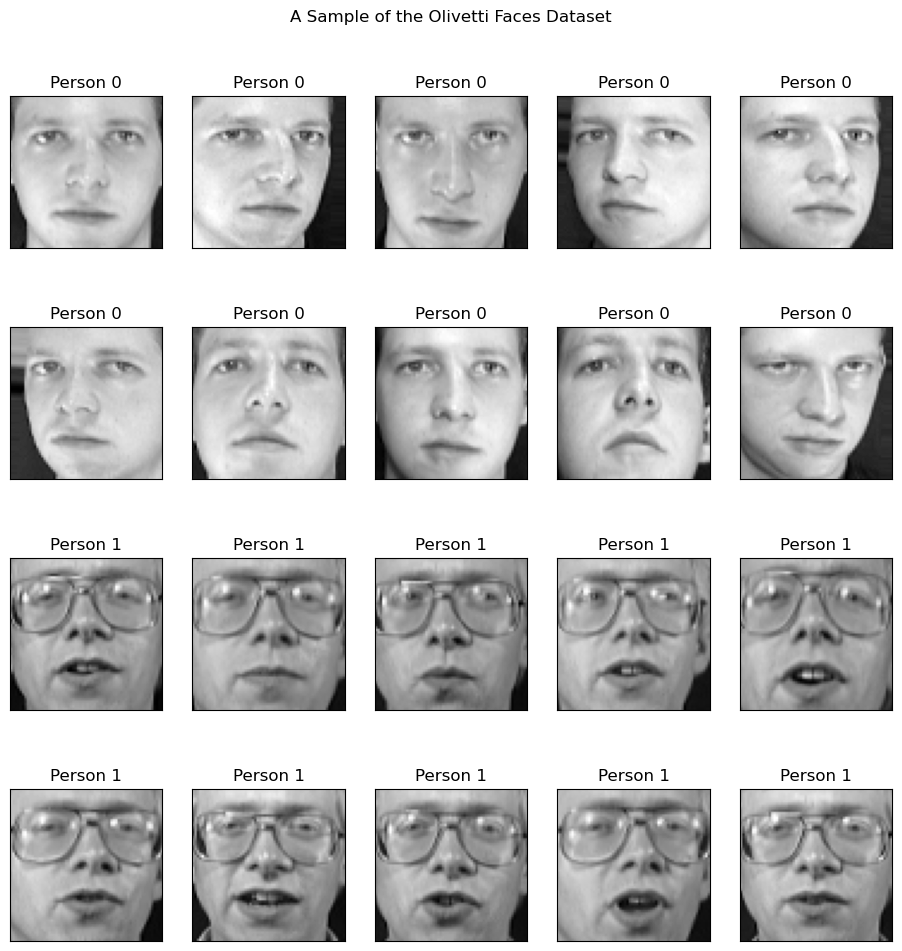

In [34]:
def plot_faces(images, titles, h, w, n_row=4, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

titles = [f"Person {label}" for label in y.squeeze().values]

plot_faces(X.values, titles, h=64, w=64)

plt.suptitle("A Sample of the Olivetti Faces Dataset")
plt.show()

In [35]:
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

print("Projecting data onto the PCA basis...")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count: {X_train_pca.shape[1]}")

Projecting data onto the PCA basis...
Original feature count: 4096
Reduced feature count: 150


# Applying the Model

In [36]:
svm = SVC()

svm.fit(X_train_pca, y_train)

pred = svm.predict(X_test_pca)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluating the Model

In [37]:
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy of SVM Model: {accuracy:.4f}")

Accuracy of SVM Model: 0.9625


In [38]:
print("Classification Report of SVM Model:\n", classification_report(y_test, pred))

Classification Report of SVM Model:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00 

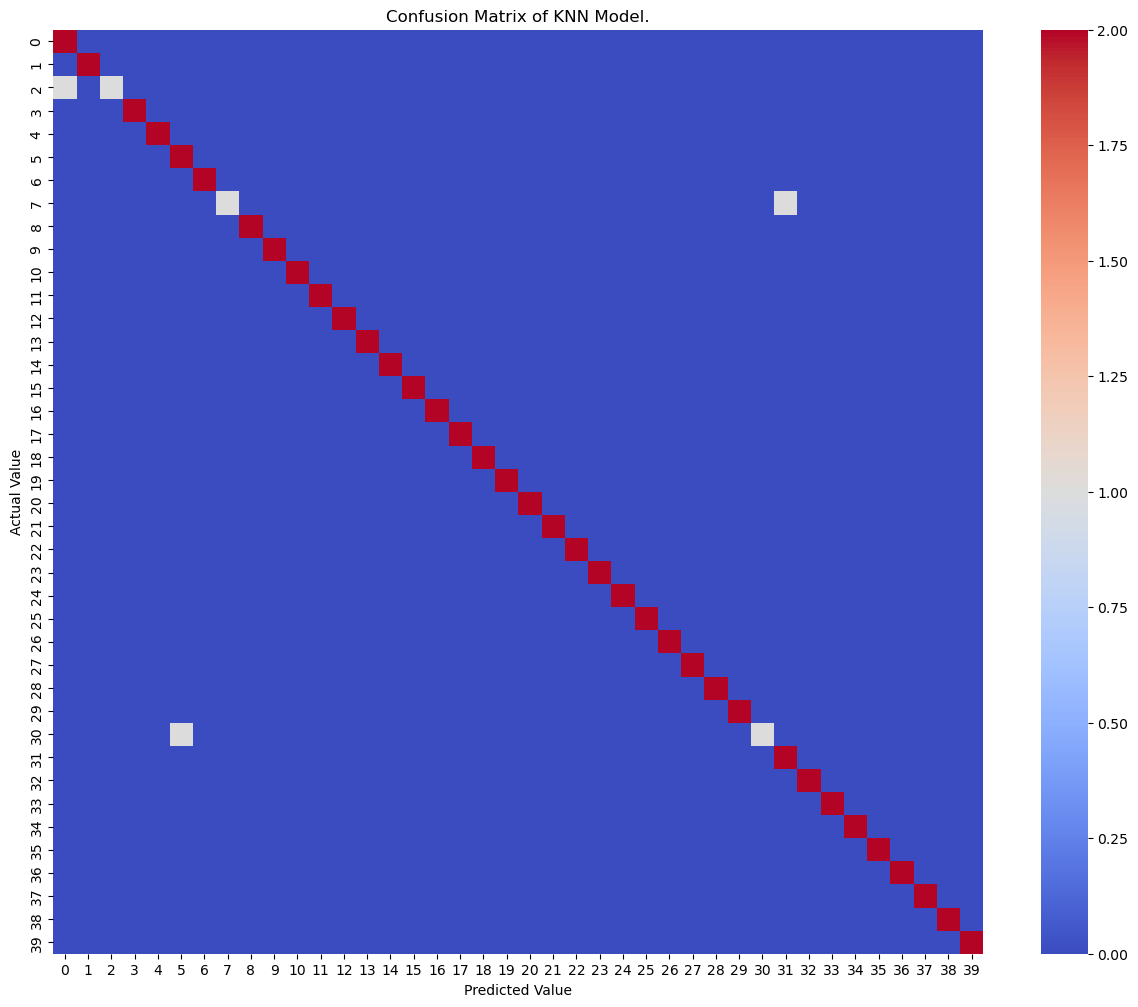

In [39]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (15,12))
sns.heatmap(cm, annot = False, cmap = 'coolwarm')
plt.title("Confusion Matrix of KNN Model.")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.show()